## EDA for Social Media Engagement on Twitter

### Exploratory Data Analysis about distribution of model input features and target variable in the dataset


#### 1) Calculate summary statistics

#### 2) Visualise class distribution

#### 3) Derive key insights


### EDA Insight from Input features

#### 36% of tweet contains Hindi text

###### It can be seen that most of the time, tweet has been considered for Hashtag only once (1 class has 47%)

######  Most of the Follower count falls under 10000

###### It can be seen that only 23% tweet contains url¶

##### There are 53% tweet with 0 emotion score 

#### 85% of tweet have been retweeted

###### It can be seen that most of the tweet has been done between 6am and 12pm

###### It can be seen that almost 60% of tweet has been done on Wednesday

###### Like engagement quotient has over 93% as 0 and is not the important factor contributing for Tweet Engagment

###### Quote engagement quotient is almost nill and is not the important factor contributing for Tweet Engagement

######  Reply engagement quotient is almost nill and is not the important factor contributing for Tweet Engagement

###### It can be seen that most of the tweet (95%) have not been replied

###### It can be seen that only 0.68% are verified account and most of the tweet engagement has been through non-verified (regular accounts)

### Importing Python libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import   accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("D:/IIT Delhi/Project_work/tanishq_final2.csv",encoding='latin-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231339 entries, 0 to 231338
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               231339 non-null  int64  
 1   text             218978 non-null  object 
 2   hashtag_count    231339 non-null  int64  
 3   is_reply         231339 non-null  int64  
 4   is_retweet       231339 non-null  int64  
 5   time             231339 non-null  int64  
 6   day              231339 non-null  int64  
 7   url              231339 non-null  int64  
 8   retweet_count    231339 non-null  int64  
 9   reply_count      231339 non-null  int64  
 10  like_count       231339 non-null  int64  
 11  quote_count      231339 non-null  int64  
 12  follower_count   231339 non-null  int64  
 13  verified         231339 non-null  int64  
 14  sentiment_score  231339 non-null  float64
 15  emotion_score    231339 non-null  float64
dtypes: float64(2), int64(13), object(1)
me

In [5]:
df.head(5)

,id,text,hashtag_count,is_reply,is_retweet,time,day,url,retweet_count,reply_count,like_count,quote_count,follower_count,verified,sentiment_score,emotion_score
0,0,please ... do not buy from.. they are working ...,3,0,1,23,2,0,806,0,0,0,34,0,0.3182,0.3182
1,1,please ... do not buy from.. they are working ...,3,0,1,23,2,0,806,0,0,0,230,0,0.3182,0.3182
2,2,had an opportunity to express my views on the ...,1,0,1,23,2,0,2158,0,0,0,111,0,0.5859,0.5859
3,3,please ... do not buy from.. they are working ...,3,0,1,23,2,0,806,0,0,0,3833,0,0.3182,0.3182
4,4,please ... do not buy from.. they are working ...,3,0,1,23,2,0,806,0,0,0,247,0,0.3182,0.3182


## Calculate summary statistics

#### Frequency Distribution for retweet_count

In [65]:
# create new variable 'retweet_class to get insght on retweet_count classification' with  list of  conditions
conditions = [
    (df['retweet_count'] <= 0),
    (df['retweet_count'] >= 1) & (df['retweet_count'] <= 10),
    (df['retweet_count'] > 10) & (df['retweet_count'] <= 100),
    (df['retweet_count'] > 100) & (df['retweet_count'] <= 1000),
    (df['retweet_count'] > 100)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1-10', '10-100','100-1k', '1k+']

# create a new column and use np.select to assign values to it using our lists as arguments
df['retweet_class'] = np.select(conditions, values)

# display updated DataFrame
df.head(2)

,serial_number,text,hashtag_count,is_reply,is_retweet,time,day,url,retweet_count,reply_count,like_count,quote_count,follower_count,verified,sentiment_score,emotion_score,retweet_class
0,0,please ... do not buy from.. they are working ...,3,0,1,23,2,0,806,0,0,0,34,0,0.3182,0.3182,100-1k
1,1,please ... do not buy from.. they are working ...,3,0,1,23,2,0,806,0,0,0,230,0,0.3182,0.3182,100-1k


In [80]:
#retweet_count classification on the basis of frequncy
crosstb = pd.crosstab(index=df['retweet_class'], columns='retweet_count')
pd.crosstab(index=df['retweet_class'], columns='retweet_count')


col_0,retweet_count
retweet_class,
0,26147
1-10,22630
10-100,32720
100-1k,78047
1k+,71795


In [60]:
#percentage distribution of retweet_count
crosstb/crosstb.sum()*100

col_0,retweet_count
retweet_class,
0,11.302461
1-10,9.782181
10-100,14.143746
100-1k,33.737070
1k+,31.034542


##### It can be seen that over 60% of retweet count has occurence between 100 and 1K+

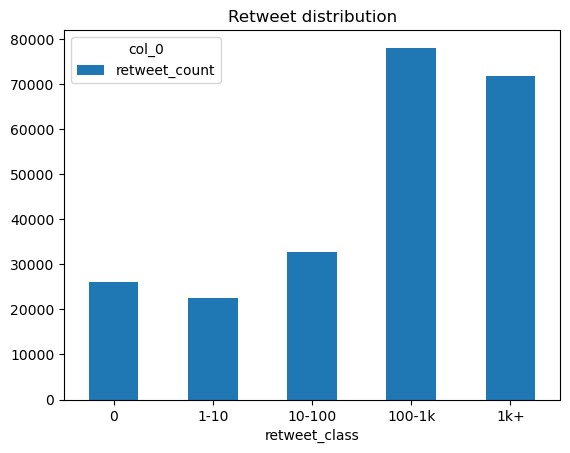

In [81]:
barplot = crosstb.plot.bar(rot=0,title="Retweet distribution")

### Calculating other summary and null check

In [62]:
# create subset data frame for the retweet counts
df_rw = df[['retweet_count']]
df_rw.describe()

,retweet_count
count,231339.000000
mean,929.224186
std,1352.498997
min,0.000000
25%,24.000000
50%,375.000000
75%,1338.000000
max,6332.000000


In [63]:
df_rw.isna().sum()

retweet_count    0
dtype: int64

## Exploratory Data Analysis for Input feature from the dataset and extract statistical insight 


In [6]:
# extract input features
df_input = df[['hashtag_count', 'is_reply', 'is_retweet', 'time', 'day', 'url','reply_count','like_count','quote_count','follower_count','verified','emotion_score']]
df_input.head()

,hashtag_count,is_reply,is_retweet,time,day,url,reply_count,like_count,quote_count,follower_count,verified,emotion_score
0,3,0,1,23,2,0,0,0,0,34,0,0.3182
1,3,0,1,23,2,0,0,0,0,230,0,0.3182
2,1,0,1,23,2,0,0,0,0,111,0,0.5859
3,3,0,1,23,2,0,0,0,0,3833,0,0.3182
4,3,0,1,23,2,0,0,0,0,247,0,0.3182


### Statistical Summary view for Emotion Score

In [7]:
df_input['emotion_score'].describe()

count    231339.000000
mean          0.226570
std           0.297293
min           0.000000
25%           0.000000
50%           0.000000
75%           0.458800
max           0.986000
Name: emotion_score, dtype: float64

In [17]:
conditions = [
    (df_input['emotion_score'] > 0) & (df_input['emotion_score'] <=0.05),
    (df_input['emotion_score'] >0.05) & (df_input['emotion_score'] <=0.10),
    (df_input['emotion_score'] >0.10) & (df_input['emotion_score'] <=0.5),
    (df_input['emotion_score'] >0.5) & (df_input['emotion_score'] <=1),
    ]


# create a list of the values we want to assign for each condition
values = ['0 - 0.05', '0.05 - 0.1', '0.1 - 0.5','0.5 - 1']

# create a new column and use np.select to assign values to it using our lists as arguments
df_input['emotion_score_class'] = np.select(conditions, values)

# display updated DataFrame
df_input.head(2)

pd.crosstab(index=df_input['emotion_score_class'], columns='emotion_score')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6848\1482160317.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['emotion_score_class'] = np.select(conditions, values)


col_0,emotion_score
emotion_score_class,
0,123045
0 - 0.05,2187
0.05 - 0.1,4684
0.1 - 0.5,56284
0.5 - 1,45139


In [16]:
crossem = pd.crosstab(index=df_input['emotion_score_class'], columns='emotion_score')
crossem/crossem.sum()*100

col_0,emotion_score
emotion_score_class,
0,53.188178
0-0.05,0.945366
0.05 - 0.1,2.024734
0.1 - 0.5,24.329663
0.5 - 1,19.512058


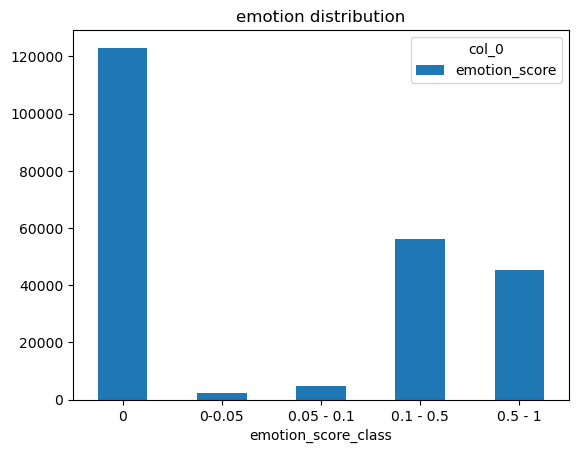

In [18]:
barplotem = crossem.plot.bar(rot=0,title="emotion distribution")

### Statistical Summary view for Hashtag_count

In [73]:
df_input['hashtag_count'].describe()

count    231339.000000
mean          1.374537
std           1.371288
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          33.000000
Name: hashtag_count, dtype: float64

In [74]:
df_input['hashtag_count'].isna().sum()

0

In [87]:
conditions = [
    (df_input['hashtag_count'] <= 0),
    (df_input['hashtag_count'] >= 1) & (df_input['hashtag_count'] < 2),
    (df_input['hashtag_count'] >=2) & (df_input['hashtag_count'] < 3),
    (df_input['hashtag_count'] <= 3)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2', '3+']

# create a new column and use np.select to assign values to it using our lists as arguments
df_input['hashtag_count_class'] = np.select(conditions, values)

# display updated DataFrame
df_input.head(2)

pd.crosstab(index=df_input['hashtag_count_class'], columns='hashtag_count')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7564\2280216564.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['hashtag_count_class'] = np.select(conditions, values)


col_0,hashtag_count
hashtag_count_class,
0,54066
1,109798
2,47975
3+,19500


In [88]:
crossth = pd.crosstab(index=df_input['hashtag_count_class'], columns='hashtag_count')
crossth/crossth.sum()*100


col_0,hashtag_count
hashtag_count_class,
0,23.370897
1,47.461950
2,20.737965
3+,8.429188


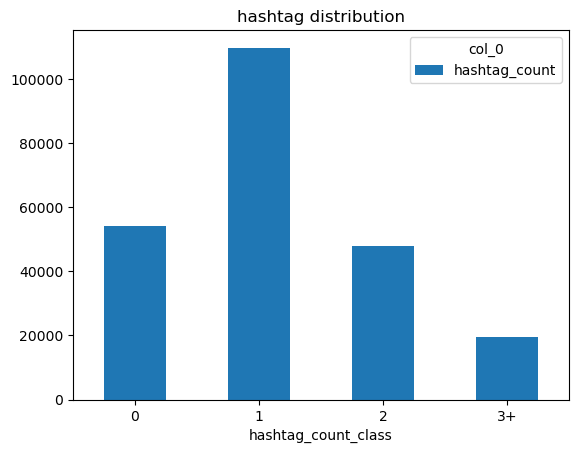

In [89]:
barploth = crossth.plot.bar(rot=0,title="hashtag distribution")

##### It can be seen that most of the time, tweet has been considered for Hashtag only once (1 class has 47%)

### Statistical Summary view for reply_count

In [91]:
df_input['reply_count'].describe()

count    231339.000000
mean          0.182481
std          12.905379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4522.000000
Name: reply_count, dtype: float64

In [92]:
df_input['reply_count'].isna().sum()

0

In [187]:
conditions = [
    (df_input['reply_count'] <= 0),
    (df_input['reply_count'] >= 1) & (df_input['reply_count'] <= 10),
    (df_input['reply_count'] >10) & (df_input['reply_count'] <= 50),
    (df_input['reply_count'] >50) & (df_input['reply_count'] <= 100),
    (df_input['reply_count'] < 100)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1-10', '10-50', '50-100','100+']

# create a new column and use np.select to assign values to it using our lists as arguments
df_input['reply_count_class'] = np.select(conditions, values)

# display updated DataFrame
df_input.head(2)

pd.crosstab(index=df_input['reply_count_class'], columns='reply_count')


col_0,reply_count
reply_count_class,
0,226482
1-10,4521
10-50,272
50-100,64


In [188]:
crosstr = pd.crosstab(index=df_input['reply_count_class'], columns='reply_count')
crosstr/crosstr.sum()*100


col_0,reply_count
reply_count_class,
0,97.900484
1-10,1.954275
10-50,0.117576
50-100,0.027665


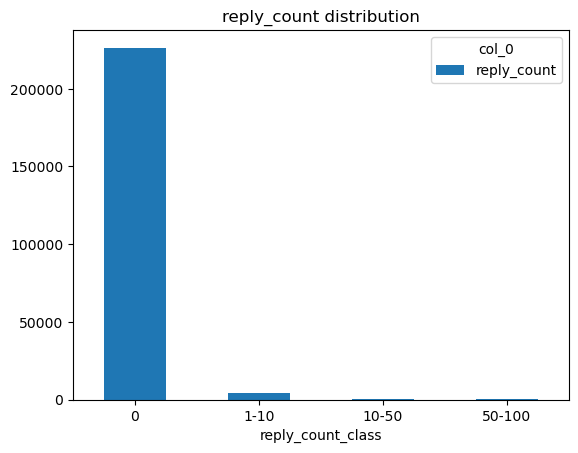

In [95]:
barplotr = crosstr.plot.bar(rot=0,title="reply_count distribution")

##### Reply engagement quotient is almost nill and is not the important factor contributing for Tweet Engagement

### Statistical Summary view for follower_count

In [97]:
df_input['follower_count'].describe()

count    2.313390e+05
mean     8.252037e+03
std      2.430598e+05
min      0.000000e+00
25%      6.500000e+01
50%      2.380000e+02
75%      8.620000e+02
max      1.584126e+07
Name: follower_count, dtype: float64

In [98]:
df_input['follower_count'].isna().sum()

0

In [109]:
conditions = [
    (df_input['follower_count'] < 10000),
    (df_input['follower_count'] >= 10000) & (df_input['follower_count'] <= 100000),
    (df_input['follower_count'] >100000) & (df_input['follower_count'] <= 1000000),
    (df_input['follower_count'] >1000000) & (df_input['follower_count'] <= 10000000),
    (df_input['follower_count'] < 10000000)
    ]

# create a list of the values we want to assign for each condition
values = ['<10K', '10K-1L', '1L-10L','10L-1cr','+1M']


# create a new column and use np.select to assign values to it using our lists as arguments
df_input['follower_count_class'] = np.select(conditions, values)

# display updated DataFrame
df_input.head(2)

pd.crosstab(index=df_input['follower_count_class'], columns='follower_count')

#labels = ['<10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7564\1244487061.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['follower_count_class'] = np.select(conditions, values)


col_0,follower_count
follower_count_class,
0,48
10K-1L,7885
10L-1cr,197
1L-10L,749
<10K,222460


In [110]:
## 0 belongs to class greater than 1 crore

In [111]:
crosstf = pd.crosstab(index=df_input['follower_count_class'], columns='follower_count')
crosstf/crosstf.sum()*100


col_0,follower_count
follower_count_class,
0,0.020749
10K-1L,3.408418
10L-1cr,0.085156
1L-10L,0.323767
<10K,96.161910


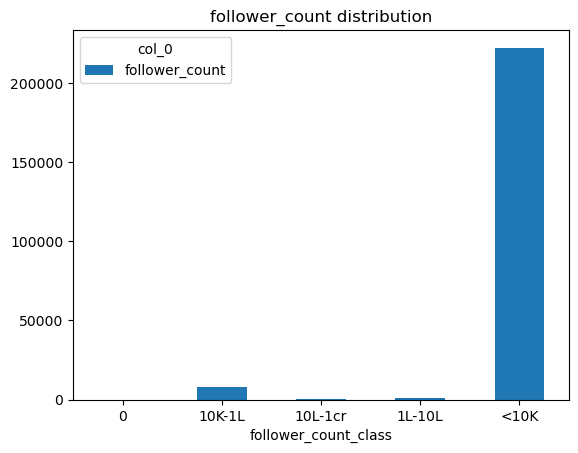

In [113]:
barplotf = crosstf.plot.bar(rot=0,title="follower_count distribution")

#### Most of the Follower count falls under 10000

### Statistical Summary view for like_count

In [114]:
df_input['like_count'].describe()

count    231339.000000
mean          2.424602
std         106.058343
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       21409.000000
Name: like_count, dtype: float64

In [115]:
df_input['like_count'].isna().sum()

0

In [183]:
conditions = [
    (df_input['like_count'] <= 0),
    (df_input['like_count'] >= 1) & (df_input['like_count'] <= 10),
    (df_input['like_count'] >10) & (df_input['like_count'] <= 50),
    (df_input['like_count'] >50) & (df_input['like_count'] <= 100),
    (df_input['like_count'] < 100)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1-10', '10-50', '50-100','100+']

# create a new column and use np.select to assign values to it using our lists as arguments
df_input['like_count_class'] = np.select(conditions, values)

# display updated DataFrame
df_input.head(2)

pd.crosstab(index=df_input['like_count_class'], columns='like_count')


col_0,like_count
like_count_class,
0,12148
1-10,5717
10-50,663
50-100,170


In [184]:
crosstl = pd.crosstab(index=df_unique['like_count_class'], columns='like_count')
crosstl/crosstl.sum()*100

col_0,like_count
like_count_class,
0,64.969515
1-10,30.575463
10-50,3.545834
50-100,0.909188


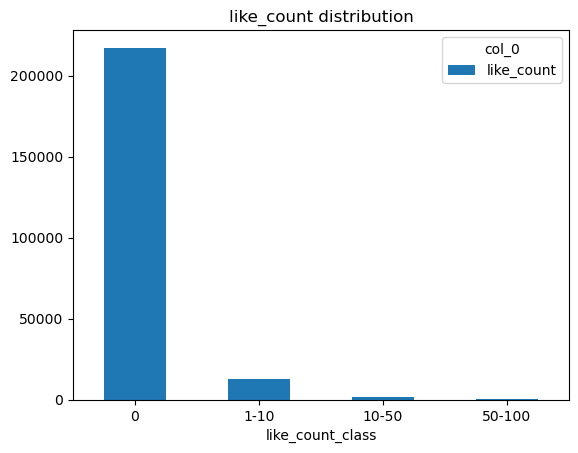

In [119]:
barplotl = crosstl.plot.bar(rot=0,title="like_count distribution")

##### Like engagement quotient has over 93% as 0 and is not the important factor contributing for Tweet Engagment

### Statistical Summary view for quote_count

In [120]:
df_input['quote_count'].describe()

count    231339.000000
mean          0.070161
std           8.372321
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3711.000000
Name: quote_count, dtype: float64

In [121]:
df_input['quote_count'].isna().sum()

0

In [181]:
conditions = [
    (df_input['quote_count'] <= 0),
    (df_input['quote_count'] >= 1) & (df_input['quote_count'] <= 10),
    (df_input['quote_count'] >10) & (df_input['quote_count'] <= 50),
    (df_input['quote_count'] >50) & (df_input['quote_count'] <= 100),
    (df_input['quote_count'] < 100)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1-10', '10-50', '50-100','100+']

# create a new column and use np.select to assign values to it using our lists as arguments
df_input['quote_count_class'] = np.select(conditions, values)

# display updated DataFrame
df_input.head(2)

pd.crosstab(index=df_input['quote_count_class'], columns='quote_count')


col_0,quote_count
quote_count_class,
0,17710
1-10,919
10-50,57
50-100,12


In [182]:
crosstq = pd.crosstab(index=df_unique['quote_count_class'], columns='quote_count')
crosstq/crosstq.sum()*100

col_0,quote_count
quote_count_class,
0,94.716012
1-10,4.914964
10-50,0.304845
50-100,0.064178


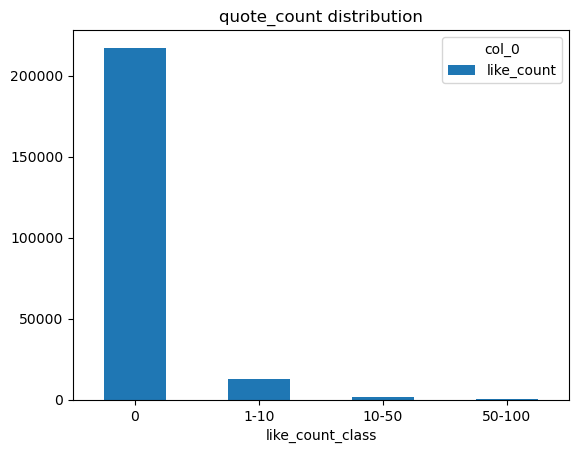

In [125]:
barplotq = crosstl.plot.bar(rot=0,title="quote_count distribution")

##### Quote engagement quotient is almost nill and is not the important factor contributing for Tweet Engagement

### Statistical Summary view for time of tweet creation

In [128]:
df_input['time'].describe()

count    231339.000000
mean          9.514716
std           5.253183
min           0.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          23.000000
Name: time, dtype: float64

In [130]:
df_input['time'].isna().sum()

0

In [136]:
conditions = [
    (df['time'] >= 0) & (df['time'] <= 6),
    (df['time'] >6) & (df['time'] <= 12),
    (df['time'] >12) & (df['time'] <= 18),
    (df['time'] >18) & (df['time'] <= 23)
    ]

# create a list of the values we want to assign for each condition
values = ['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Hour_of_tweet_creation'] = np.select(conditions, values)

# display updated DataFrame
df.head(2)

pd.crosstab(index=df['Hour_of_tweet_creation'], columns='time')


col_0,time
Hour_of_tweet_creation,
12am-6am,74196
12pm-6pm,59997
6am-12pm,86939
6pm-12am,10207


In [138]:
crosstti = pd.crosstab(index=df['Hour_of_tweet_creation'], columns='time')
crosstti/crosstti.sum()*100

col_0,time
Hour_of_tweet_creation,
12am-6am,32.072413
12pm-6pm,25.934667
6am-12pm,37.580780
6pm-12am,4.412140


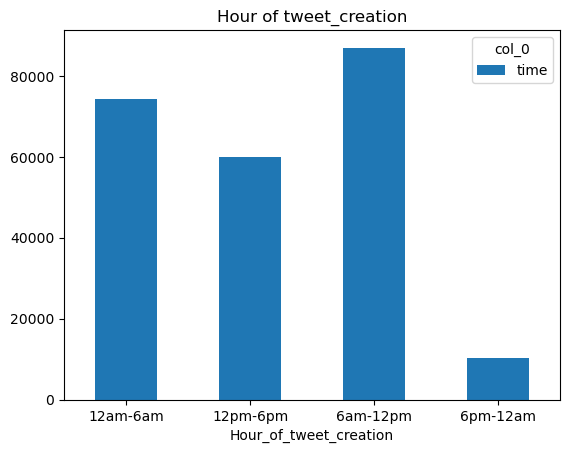

In [139]:
crosstti = pd.crosstab(index=df['Hour_of_tweet_creation'], columns='time')
barplotti = crosstti.plot.bar(rot=0,title="Hour of tweet_creation")

#### It can be seen that most of the tweet has been done between 6am and 12pm

### Statistical Summary view for day

In [142]:
crossday = pd.crosstab(index=df_input['day'], columns='count')
crossday

col_0,count
day,
1,7673
2,2462
3,138625
4,48556
5,21796
6,8408
7,3819


In [143]:
crossday/crossday.sum()*100

col_0,count
day,
1,3.316778
2,1.064239
3,59.922884
4,20.989111
5,9.421671
6,3.634493
7,1.650824


#### It can be seen that almost 60% of tweet has been done on Wednesday

### Statistical Summary view for is_reply

In [144]:
df['is_reply'].astype('bool').describe()

count     231339
unique         2
top        False
freq      221527
Name: is_reply, dtype: object

In [145]:
crossre = pd.crosstab(index=df['is_reply'], columns='count')
crossre

col_0,count
is_reply,
0,221527
1,9812


In [146]:
crossre/crossre.sum()*100

col_0,count
is_reply,
0,95.758605
1,4.241395


#### It can be seen that most of the tweet (95%) have not been replied

### Statistical Summary view for verified

In [147]:
df['verified'].astype('bool').describe()

count     231339
unique         2
top        False
freq      229746
Name: verified, dtype: object

In [178]:
crossv = pd.crosstab(index=df['verified'], columns='count')
crossv

col_0,count
verified,
0,229746
1,1593


In [179]:
crossv/crossv.sum()*100

col_0,count
verified,
0,99.3114
1,0.6886


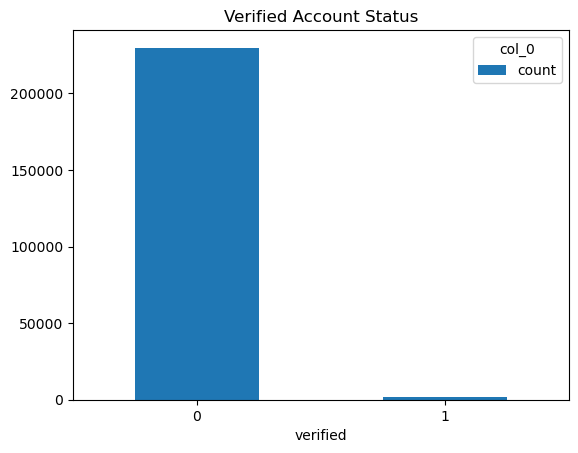

In [150]:
barplotv = crossv.plot.bar(rot=0,title="Verified Account Status")

#### It can be seen that only 0.68% are verified account and most of the tweet engagement has been through non-verified (regular accounts) 

### Statistical Summary view for url

In [153]:
df['url'].astype('bool').describe()

count     231339
unique         2
top        False
freq      177748
Name: url, dtype: object

In [154]:
crossu = pd.crosstab(index=df['url'], columns='count')
crossu

col_0,count
url,
0,177748
1,53591


In [155]:
crossu/crossu.sum()*100

col_0,count
url,
0,76.834429
1,23.165571


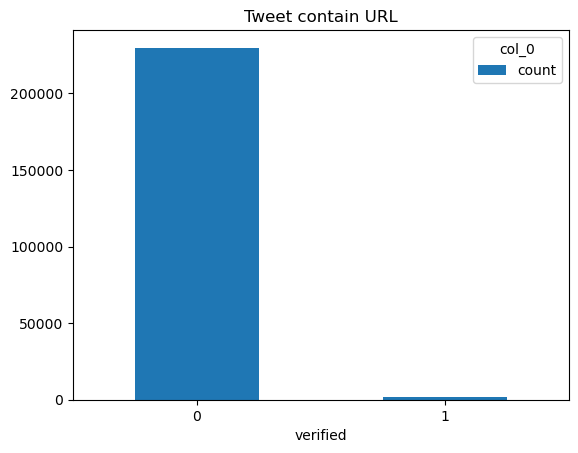

In [159]:
barplotv = crossv.plot.bar(rot=0,title="Tweet contain URL")

#### It can be seen that only 23% tweet contains url

### Statistical Summary view for is_retweet

In [19]:
df['is_retweet'].astype('bool').describe()

count     231339
unique         2
top         True
freq      197473
Name: is_retweet, dtype: object

In [20]:
crossret = pd.crosstab(index=df['is_retweet'], columns='count')
crossret

col_0,count
is_retweet,
0,33866
1,197473


In [22]:
crossret/crossret.sum()*100

col_0,count
is_retweet,
0,14.639123
1,85.360877


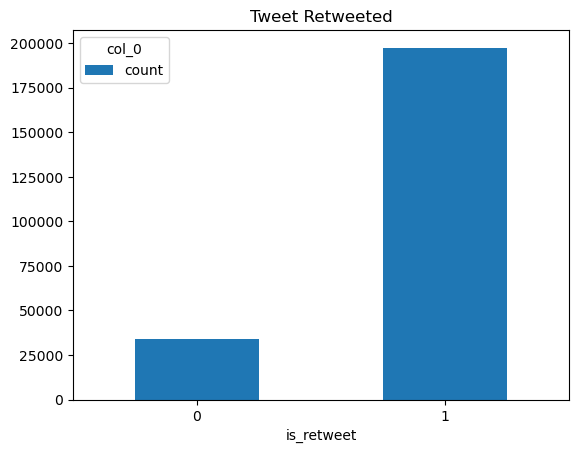

In [21]:
barplotret = crossret.plot.bar(rot=0,title="Tweet Retweeted")

### EDA Insight from Input features

#### 36% of tweet contains Hindi text

###### It can be seen that most of the time, tweet has been considered for Hashtag only once (1 class has 47%)

######  Most of the Follower count falls under 10000

###### It can be seen that only 23% tweet contains url¶

##### There are 53% tweet with 0 emotion score 

#### 85% of tweet have been retweeted

###### It can be seen that most of the tweet has been done between 6am and 12pm

###### It can be seen that almost 60% of tweet has been done on Wednesday

###### Like engagement quotient has over 93% as 0 and is not the important factor contributing for Tweet Engagment

###### Quote engagement quotient is almost nill and is not the important factor contributing for Tweet Engagement

######  Reply engagement quotient is almost nill and is not the important factor contributing for Tweet Engagement

###### It can be seen that most of the tweet (95%) have not been replied

###### It can be seen that only 0.68% are verified account and most of the tweet engagement has been through non-verified (regular accounts)

